# 2주차

### 타이타닉 데이터 Optimization&회귀분석 
[Titanic_data](https://www.kaggle.com/c/titanic)


첫번째 캐글 완료, 두번째 캐글 그리드서치 오류로 미완.

## 1.  [Titanic: logistic regression with python](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python)<br>

## **1. 데이터와 패키지 불러오기**

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read CSV data file into DataFrame
train_df= pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/train.csv')
test_df = pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/test.csv')

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [4]:
# preview testdata
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


## **2. Data Quality and Missing Value**

In [6]:
# check missing values in train data
# 학습데이터의 결측치 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age

In [7]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


> 약 20%의 결측치를 가지고 있음. 변수의 분포를 확인

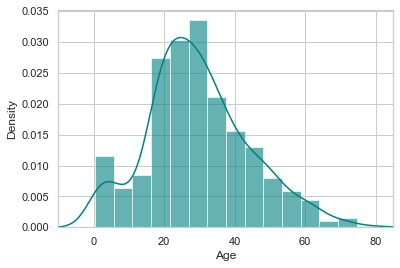

In [8]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

> Age변수는 오른쪽으로 긴 꼬리를 가지기 때문에 결측치 처리를 위해서 편향될 수 있는 평균이 아닌 중앙값 이용한다.

In [9]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


* Cabin

In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


> 77%의 결측치를 가지고 있어 모델에 적합하지 않다고 판단. 모델에서 제외

* Embarked

In [11]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


> 결측치수가 매우 적기때문에 가장 많은 승객들이 탑승한 S로 처리할 수 있따. 

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


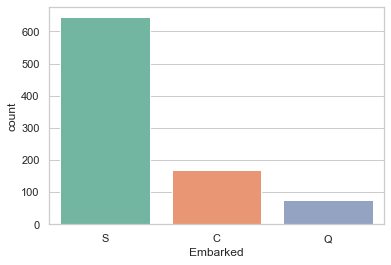

In [12]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [13]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


* 결측치 대체

Age - 중앙값 <br>
Embarked - 가장 많은 분포를 보여주는 S <br>
Cabin - 제외

In [14]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [15]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


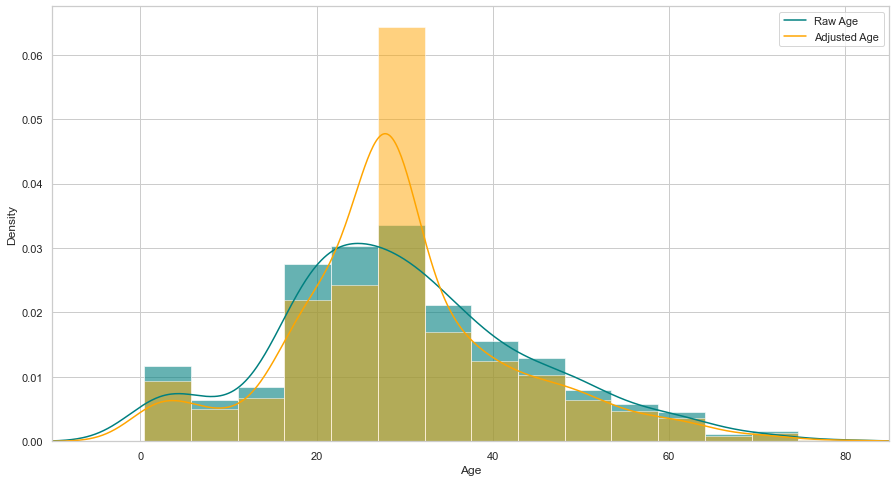

In [17]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

* 추가 변수 처리

In [18]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

> 혼자 탑승했는지의 여부를 나타내는 범주형 변수 생성

In [19]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


> Pclass, Sex, Embarked 범주형 변수로 변환

* testdata에도 동일 작업 처리

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## **3. EDA(탐색적 자료분석)**

* Age 탐색

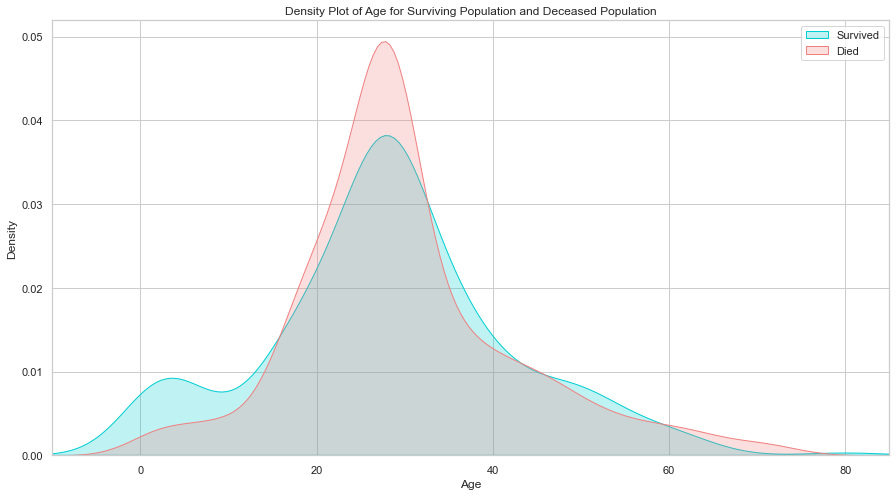

In [22]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

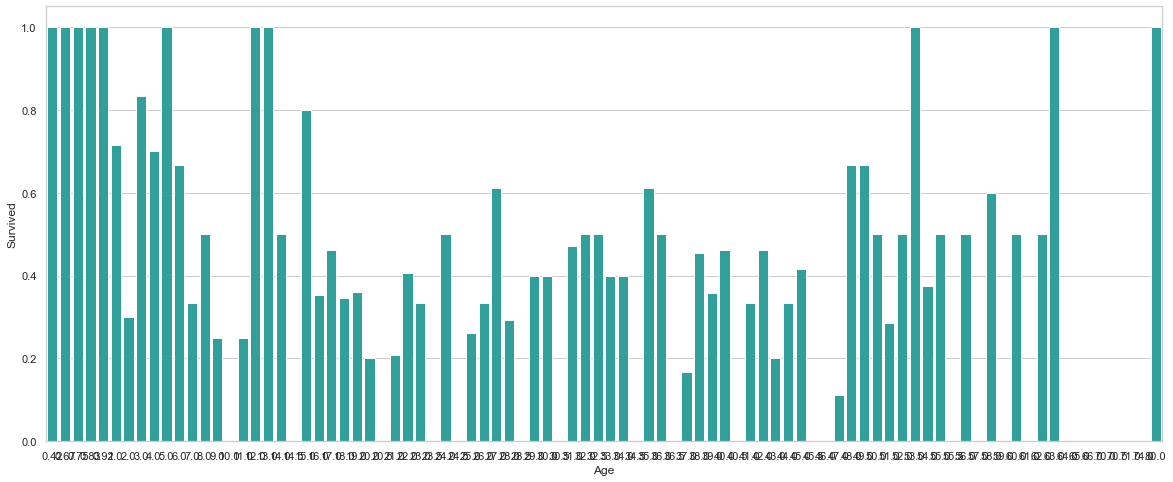

In [23]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [24]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

* Fare

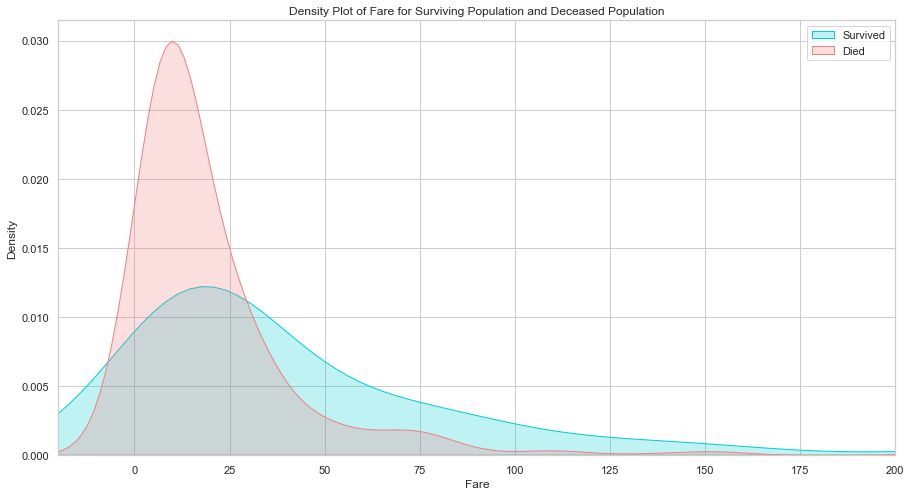

In [25]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

* Pclass

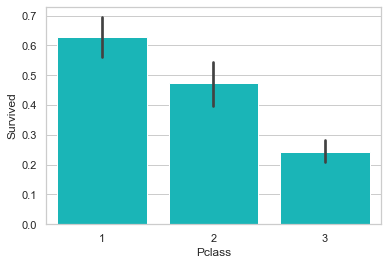

In [26]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

* Port

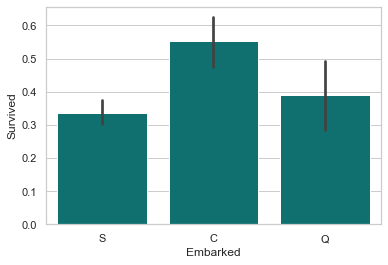

In [27]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

* TravelAlone, Survived

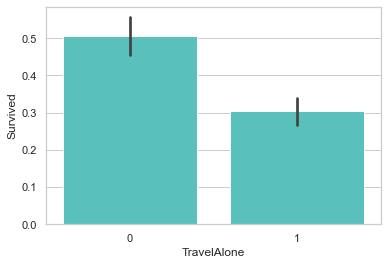

In [28]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

* Gender

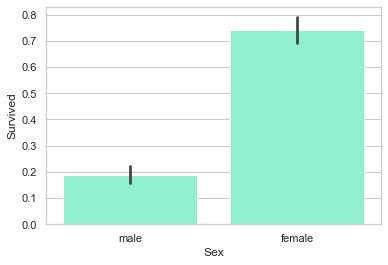

In [29]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

## **4. 로지스틱 회귀분석**

###  4-1. 변수선택

* 반복적 특징 제거
> RFE : 변수에 가중치를 할당하는 외부 추정량이 주어지는 경우 점점 더 작은 변수를 재귀적으로 고려하여 변수를 선정한다. 
    > - 추정량은 초기 특징 집합에 대하여 훈련되고 각변수의 중요도는 coef_attribute, 혹은 feature_importances_attribute를 통하여 얻을 수 있다. 
    > -  덜 중요한 변수는 현재 변수 집합에서 제외된다. 
    > - 재귀적으로 반복하여 적절한 변수를 선택한다. 


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


* 재귀적 변수 제거와 교차검증을 통한 변수 순위

> RFECV는 optimal number나 최적의 변수 개수를 찾기위하여 교차 검증 루프에서 RFE를 수행한다. 그 후 교차검증을 통하여 선택한 변수수를 조정하여 로지스틱 회귀분석에 적용된 변수를 제거한다 

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


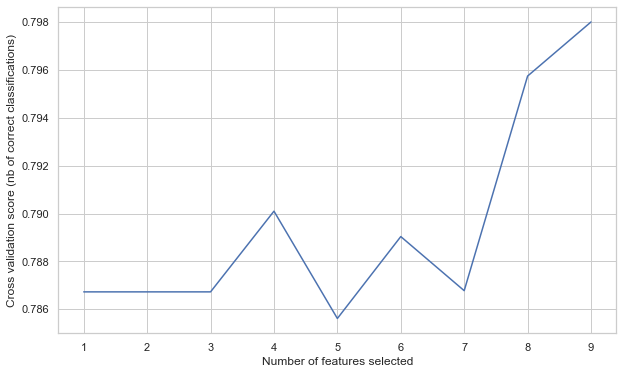

In [31]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

> 8개의 변수가 선택되었다. 

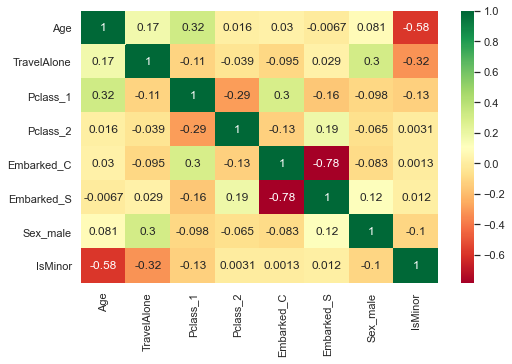

In [32]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

###  4-2. 모델적합도 절차 검정

* train_test_split()을 기반으로 한 모델적합도 

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


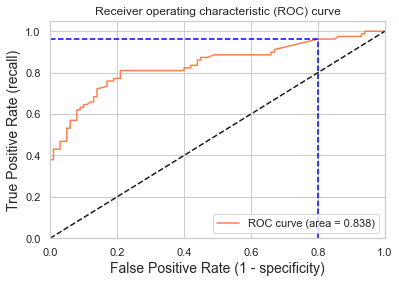

Using a threshold of 0.070 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

* K-fold cross-validation을 이용한 모델적합도 (cross_val_score())

In [34]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


* K-fold cross-validation을 이용한 모델적합도 (cross_validate())

In [35]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.024)
LogisticRegression average log_loss: 0.454 (+/-0.037)
LogisticRegression average auc: 0.850 (+/-0.028)


* 만약 'Fare'변수를 추가하는 경우 다음과 같은 모델생성

In [36]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.798 (+/-0.027)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


> 따라서 Fare변수는 의미있는 변수가 아니다. 

###  4-3. GridSearchCV _ multiple scorers 이용

best params: LogisticRegression(C=2.50001)
best params: {'C': 2.50001}
best score: 0.8069662921348316


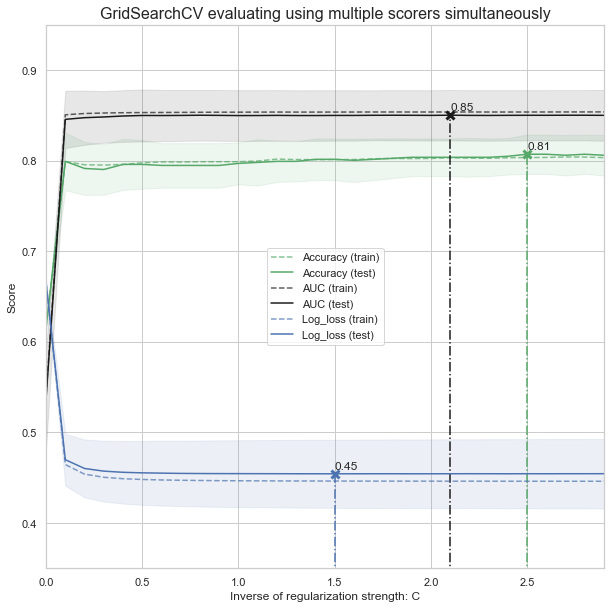

In [37]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

###  4-4. GridSearchCV _ multiple scorers, RepeatedStratifiedKFold, pipeline 이용

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=5.10001))])
best params: {'clf__C': 5.10001}
best score: 0.7995505617977527


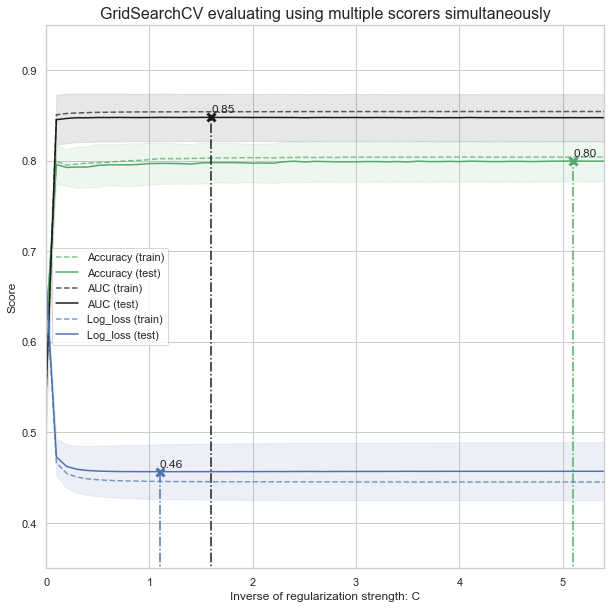

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

## 5. Submission

In [39]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


## 2.  [Interpretation and Tuning of Hyperparameters](https://www.kaggle.com/anirudh2312/interpretation-and-tuning-of-hyperparameters)<br>

## 1. 라이브러리 및 패키지 불러오기

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# 시각화 그래프
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import tools

import random
import re

# 전처리 위해서
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#Warnings 메세지 제거
import warnings 
warnings.filterwarnings('ignore')


## 2. 데이터 불러오기

In [41]:
train_df= pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/train.csv')
test_df = pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/test.csv')

In [42]:
print(train_df, test_df)
print(train_df.shape, test_df.shape)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
train_df.shape

(891, 12)

In [46]:
#칼럼확인
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
#타겟변수 확인
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [50]:
#결측치 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. EDA(Explorartory Data Analysis)

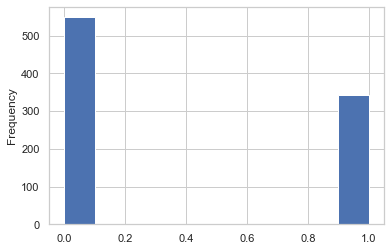

In [51]:
#'Survived' Column 분포 확인
train_df['Survived'].astype(int).plot.hist();

> 종속 변수의 데이터 분포가 비교적 비슷하다. 

* 결측치 처리

In [52]:
# 결측치 값을 계산하는 함수
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [53]:
# Missing values statistics
missing_values = missing_values_table(train_df)
missing_values

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


> 3개의 독립변수가 결측치를 가지고 있는데 그중 Cabin 변수는 77%의 결측치를 가지고 있으므로 drop을 고려해본다. <br>
> Embarked 칼럼은 2개의 결측치를 가지고 있기 때문에 모델에 영향을 주지 않고 결측치 처리 가능

In [54]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

## 4. Feature Engineering

> Name변수는 범주형 변수이고 각 승객에 대하여 고유하기 때문에 모델에 바로 사용할 수 없다. 하지만, 이 변수를 이용하여 'Title'이라는 새로운 변수를 생성할 수 있다.  

In [55]:
# Name 변수에서 'Title'변수 생성하는 함수
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
train_df['Title'] = train_df['Name'].apply(get_title)
test_df['Title'] = test_df['Name'].apply(get_title)

In [56]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Sir           1
Mme           1
Capt          1
Lady          1
Jonkheer      1
Ms            1
Countess      1
Name: Title, dtype: int64

In [57]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

> 적은 값들을 'Others'변수로 묶어준다.

In [58]:
dict1 = {'Dr':'Others', 'Rev':'Others', 'Col':'Others', 'Mlle':'Others', 'Major':'Others', 'Capt':'Others', 'Ms':'Others', 
         'Don':'Others', 'Lady':'Others', 'Countess':'Others', 'Jonkheer':'Others', 'Mme':'Others', 'Sir':'Others'}
train_df['Title'] = train_df['Title'].replace(dict1)

dict2 = {'Col':'Others', 'Rev':'Others', 'Ms':'Others', 'Dona':'Others', 'Dr':'Others'}
test_df['Title'] = test_df['Title'].replace(dict2)

In [59]:
train_df['Title'].value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

* 데이터 수정

> 13세 미만의 남성이 Mr.타이틀을 가지는 경우는 잘못된 입력이므로 데이터를 수정해주어야 한다. 만약, 이러한 수정을 한두번 하는 경우는 모델에 영향을 미치지는 않지만 데이터 수정을 많이 하는 경우 모델에 영향을 미칠 수 있어 중요하다. 

In [60]:
df = train_df.loc[train_df['Title']=='Mr']
df = df.loc[df['Age']<13]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,Mr


In [61]:
train_df.loc[[731],['Title']] = 'Master'

## 5. 자료의 시각화

In [62]:
# Function to plot the classes of the variables
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def get_percent(df, temp_col, width=800, height=500):
    cnt_srs = df[[temp_col, 'Survived']].groupby([temp_col], as_index=False).mean().sort_values(by=temp_col)

    trace = go.Bar(
        x = cnt_srs[temp_col].values[::-1],
        y = cnt_srs['Survived'].values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        name = "Percent",
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

def get_count(df, temp_col, width=800, height=500):
    cnt_srs = df[temp_col].value_counts().sort_index()

    trace = go.Bar(
        x = cnt_srs.index[::-1],
        y = cnt_srs.values[::-1],
        text = cnt_srs.values[::-1],
        textposition = 'auto',
        textfont = dict(
            size=12,
            color='rgb(0, 0, 0)'
        ),
        name = 'Count',
        orientation = 'v',
            marker = dict(
                color = random_color_generator(100),
                line=dict(color='rgb(8,48,107)',
                  width=1.5,)
            ),
            opacity = 0.7,
    )    
    return trace

def plot_count_percent_for_object(df, temp_col, height=400):
    trace1 = get_count(df, temp_col)
    trace2 = get_percent(df, temp_col)

    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Count', 'Percent'), print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)

    fig['layout']['yaxis1'].update(title='Count')
    fig['layout']['yaxis2'].update(range=[0, 1], title='% Survived')
    fig['layout'].update(title = temp_col, margin=dict(l=100), width=800, height=height, showlegend=False)

    py.iplot(fig)

In [63]:
# observe the distribution of title
warnings.simplefilter('ignore')
temp_col = train_df.columns.values[12]
plot_count_percent_for_object(train_df, temp_col)

In [64]:
# observe the distribution of Sex
temp_col = train_df.columns.values[4]
plot_count_percent_for_object(train_df, temp_col)

In [65]:
# Making a new variable/feature 'family'
train_df['family'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

test_df['family'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [66]:
# observe the distribution of family
temp_col = train_df.columns.values[11]
plot_count_percent_for_object(train_df, temp_col)

In [67]:
# Making a new variable/feature 'family_status' from the variable 'family' 
train_df['family_status'] = train_df['family']
test_df['family_status'] = test_df['family']
dict2 = {1:'Alone', 2:'NotAlone', 3:'NotAlone', 4:'NotAlone', 5:'NotAlone', 6:'NotAlone', 7:'NotAlone', 8:'NotAlone', 
         9:'NotAlone', 10:'NotAlone', 11:'NotAlone'}
train_df['family_status'] = train_df['family_status'].replace(dict2)
test_df['family_status'] = test_df['family_status'].replace(dict2)

In [68]:
train_df['family_status'].dtype

dtype('O')

In [69]:
# observe the distribution of family_status
temp_col = train_df.columns.values[12]
plot_count_percent_for_object(train_df, temp_col)

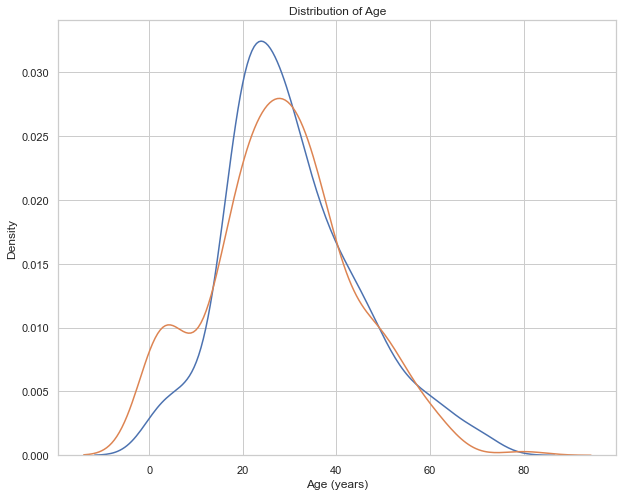

In [70]:
plt.figure(figsize = (10, 8))

df = train_df[['Survived', 'Age']]
df = df.dropna()

# KDE plot of passengers who did not survive 
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label = 'survived == 0')

# KDE plot of passengers who survived
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label = 'survived == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Age');

In [71]:
# dividing the age variable into different classes
train_df['Age'] = train_df['Age'].fillna(200) # this is just indicating the missing values
train_df['Age'] = pd.cut(train_df['Age'], bins=[0,12,40,80, 250], labels = ['Child', 'Young', 'Old', 'Missing'])

In [72]:
train_df['Age'] = train_df['Age'].astype('O')

In [73]:
temp_col = train_df.columns.values[5]
plot_count_percent_for_object(train_df, temp_col)

In [74]:
age_train= pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/train.csv')
age_test = pd.read_csv('C:/Jiwon/data/Kaggle_Study/titanic/test.csv')
train_df['Age'] = age_train['Age']
test_df['Age'] = age_test['Age']

# mean of the age variable
age_avg_train = train_df['Age'].mean()
age_avg_test = test_df['Age'].mean()
# standard deviation of the age variable 
age_std_train = train_df['Age'].std()
age_std_test = test_df['Age'].std()

age_null_count_train = train_df['Age'].isnull().sum()
age_null_count_test = test_df['Age'].isnull().sum()

# list of the random age values to be filled based on the distribution of the original age variable  
age_null_random_list_train = np.random.randint(age_avg_train - age_std_train, age_avg_train + age_std_train, size=age_null_count_train)
age_null_random_list_test = np.random.randint(age_avg_test - age_std_test, age_avg_test + age_std_test, size=age_null_count_test)

train_df['Age'][np.isnan(train_df['Age'])] = age_null_random_list_train
test_df['Age'][np.isnan(test_df['Age'])] = age_null_random_list_test

In [75]:
# dividing the age variable into different classes
train_df['Age'] = pd.cut(train_df['Age'], bins=[0,12,40,80], labels = ['Child', 'Young', 'Old'])
test_df['Age'] = pd.cut(test_df['Age'], bins=[0,12,40,80], labels = ['Child', 'Young', 'Old'])

In [76]:
train_df['Age'] = train_df['Age'].astype('O')

In [77]:
temp_col = train_df.columns.values[5]
plot_count_percent_for_object(train_df, temp_col)


In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,family,family_status
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,A/5 21171,7.2500,NaN,S,Mr,2,NotAlone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,PC 17599,71.2833,C85,C,Mrs,2,NotAlone
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,113803,53.1000,C123,S,Mrs,2,NotAlone
4,5,0,3,"Allen, Mr. William Henry",male,Young,373450,8.0500,NaN,S,Mr,1,Alone


In [79]:
drop = ['Name', 'PassengerId', 'Ticket', 'Cabin']
train_df = train_df.drop(drop, axis=1)
test_df = test_df.drop(drop, axis=1)

In [80]:
# Create a label encoder object
encoder = LabelEncoder()
encoder_count = 0

# Iterate through the columns
for col in train_df:
    if train_df[col].dtype == 'object':
        # If 2 unique classes
        if len(list(train_df[col].unique())) <= 2:
            encoder.fit(train_df[col])
            train_df[col] = encoder.transform(train_df[col])
            test_df[col] = encoder.transform(test_df[col])
            # Keep track of how many columns were label encoded
            encoder_count += 1
            
print('%d columns were label encoded.' % encoder_count)

2 columns were label encoded.


In [81]:
dict1 = {'Child':1, 'Young':2, 'Old':3}
train_df['Age'] = train_df['Age'].replace(dict1)
test_df['Age'] = test_df['Age'].replace(dict1)

In [82]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [83]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,family,family_status,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,2,7.2500,2,1,0,0,1,0,0,1,0,0
1,1,1,0,2,71.2833,2,1,1,0,0,0,0,0,1,0
2,1,3,0,2,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,1,0,2,53.1000,2,1,0,0,1,0,0,0,1,0
4,0,3,1,2,8.0500,1,0,0,0,1,0,0,1,0,0


In [84]:
test_df.head()

,Pclass,Sex,Age,Fare,family,family_status,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,1,2,7.8292,1,0,0,1,0,0,0,1,0,0
1,3,0,3,7.0000,2,1,0,0,1,0,0,0,1,0
2,2,1,3,9.6875,1,0,0,1,0,0,0,1,0,0
3,3,1,2,8.6625,1,0,0,0,1,0,0,1,0,0
4,3,0,2,12.2875,3,1,0,0,1,0,0,0,1,0


In [85]:
train = train_df
test = test_df

print(train.shape)
print(test.shape)

(891, 15)
(418, 14)


In [86]:
y = train['Survived']
x = train.drop('Survived', axis=1)

In [87]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection

In [88]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability = True),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier()
     
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, x,y, cv  = cv_split, return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

In [89]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
4,LinearDiscriminantAnalysis,0.833226,0.828358,0.00279245
12,GradientBoostingClassifier,0.898876,0.826119,0.0615381
0,LogisticRegressionCV,0.829695,0.825373,0.604838
9,AdaBoostClassifier,0.839968,0.820522,0.0531577
13,RandomForestClassifier,0.941734,0.815299,0.105189
10,BaggingClassifier,0.932584,0.81194,0.0163542
11,ExtraTreesClassifier,0.941734,0.803358,0.0854425
2,LinearSVC,0.79374,0.798881,0.0178528
8,DecisionTreeClassifier,0.941734,0.797388,0.0023937
6,BernoulliNB,0.79374,0.781343,0.00209439


In [ ]:
# grid search for svm
classifier = svm.SVC()
base_results = cross_validate(classifier, x, y, cv  = cv_split, return_train_score=True)
classifier.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'C':[0.5,1.0,2.0, 3.0],  # penalty parameter C of the error term
              'kernel':['linear', 'rbf'], # specifies the kernel type to be used in the algorithm  
              'gamma':[0.02, 0.08,0.2,1.0] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring ='accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.6645264847512039 test_score: 0.7164179104477612
epoch: 2 train_score: 0.6934189406099518 test_score: 0.6417910447761194
epoch: 3 train_score: 0.6709470304975923 test_score: 0.6828358208955224
epoch: 4 train_score: 0.6709470304975923 test_score: 0.6716417910447762
epoch: 5 train_score: 0.6613162118780096 test_score: 0.6902985074626866
epoch: 6 train_score: 0.6966292134831461 test_score: 0.6492537313432836
epoch: 7 train_score: 0.6789727126805778 test_score: 0.6753731343283582
epoch: 8 train_score: 0.6773675762439807 test_score: 0.6902985074626866
epoch: 9 train_score: 0.6918138041733547 test_score: 0.6455223880597015
epoch: 10 train_score: 0.6757624398073836 test_score: 0.6977611940298507
----------
BEFORE Tuning Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking':